<center>

<h1>Evaluating the Efficiency of Local Goverments' Environment Protection Policy</h1>

*by Cloudy Lu*

</center>

Reuse this workflow if intending to pre-process data again, the result of which is "Chinese Govt Environment Metrics 2007~2019.xlsx".

**How to obtain data**: Export "环保支出" columns of "分省财政金融文件(二)" and all columns of "分城市换进状况文件" from CSMAR database. https://cn.gtadata.com/


In [1]:
!ln -s "/content/drive/MyDrive/Murong Ye - Govt env protection eval/data" ./

In [2]:
!ln -s "/content/drive/MyDrive/Murong Ye - Govt env protection eval/Data pre-processing.ipynb" ./

In [3]:
!jupyter nbconvert --to html "./Data pre-processing.ipynb"  

[NbConvertApp] Converting notebook ./Data pre-processing.ipynb to html
/usr/local/lib/python2.7/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) [u'application/vnd.colab-display-data+json'] is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] Writing 420968 bytes to ./Data pre-processing.html


In [ ]:
!pip install pandas --upgrade
!pip install openpyxl --upgrade

     |████████████████████████████████| 11.3 MB 28.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


     |████████████████████████████████| 242 kB 36.3 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Read data

Process govt investment.

In [ ]:
investment = pd.read_excel("data/CRE_Gove02.xlsx")
investment = pd.DataFrame(data=investment.values[2:, :], columns=investment.values[0, :])
investment = investment.dropna()
investment = investment[investment['省份名称'] != '中国']
investment

,年度标识,省份编码,省份名称,环境保护支出
382,2007,120000,天津市,59143.0
383,2007,350000,福建省,97019.0
384,2007,340000,安徽省,376495.0
385,2007,620000,甘肃省,336010.0
386,2007,430000,湖南省,298387.0
...,...,...,...,...
825,2020,230000,黑龙江省,2202700.0
826,2020,430000,湖南省,2455800.0
827,2020,650000,新疆维吾尔自治区,825900.0
828,2020,460000,海南省,578400.0


Process environment metrics.

In [ ]:
env = pd.read_excel("data/CRE_Envirct.xlsx")
env = pd.DataFrame(data=env.values[2:, :], columns=env.values[0, :])

Combination.

In [ ]:
dataset = pd.DataFrame(columns=investment.columns.tolist() + env.columns[6:].tolist())
dataset

,年度标识,省份编码,省份名称,环境保护支出,环境污染治理投资总额,城市环境基础设施建设完成投资额,三废综合利用产品产值,工业废水排放量,工业废水排放达标量,工业二氧化硫去除量,工业二氧化硫排放量,工业烟尘去除量,工业烟尘排放量,工业固体废物综合利用率(%),城镇生活污水处理率(%),生活垃圾无害化处理率(%)


In [ ]:
assert dataset.shape[0] == 0, 'Dataset is not empty.'
for index, invt in investment.iterrows():
    sub_env = env[(env['年度标识'] == invt['年度标识']) & (env['省份标识'] == invt['省份编码'])]
    if sub_env.shape[0] == 0:
        continue   # No independent variable records.
    dataset_one_line = {
        '年度标识': invt['年度标识'], '省份编码': invt['省份编码'], '省份名称': invt['省份名称'],
        '环境保护支出': invt['环境保护支出'], '环境污染治理投资总额': np.nansum(sub_env['环境污染治理投资总额']),
        '城市环境基础设施建设完成投资额': np.nansum(sub_env['城市环境基础设施建设完成投资额']),
        '三废综合利用产品产值': np.nansum(sub_env['三废综合利用产品产值']),
        '工业废水排放量': np.nansum(sub_env['工业废水排放量']), '工业废水排放达标量': np.nansum(sub_env['工业废水排放达标量']),
        '工业二氧化硫去除量': np.nansum(sub_env['工业二氧化硫去除量']), '工业二氧化硫排放量': np.nansum(sub_env['工业二氧化硫排放量']),
        '工业烟尘去除量': np.nansum(sub_env['工业烟尘去除量']), '工业烟尘排放量': np.nansum(sub_env['工业烟尘排放量']),
        '工业固体废物综合利用率(%)': np.nanmean(sub_env['工业固体废物综合利用率(%)'].astype('float32')),
        '城镇生活污水处理率(%)': np.nanmean(sub_env['城镇生活污水处理率(%)'].astype('float32')),
        '生活垃圾无害化处理率(%)': np.nanmean(sub_env['生活垃圾无害化处理率(%)'].astype('float32')),
    }
    dataset = dataset.append(dataset_one_line, ignore_index=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


Preview.

In [ ]:
dataset

,年度标识,省份编码,省份名称,环境保护支出,环境污染治理投资总额,城市环境基础设施建设完成投资额,三废综合利用产品产值,工业废水排放量,工业废水排放达标量,工业二氧化硫去除量,工业二氧化硫排放量,工业烟尘去除量,工业烟尘排放量,工业固体废物综合利用率(%),城镇生活污水处理率(%),生活垃圾无害化处理率(%)
0,2007,120000,天津市,59143.0,1217394.0,820224.0,110850.9,21444.35,21381.99,164662.24,224775.0,6404306.86,62714.02,98.400002,78.209999,93.300003
1,2007,350000,福建省,97019.0,793078.0,787947.0,205189.0,136313.00,134052.00,256062.00,427576.0,4795285.00,81957.00,82.957779,63.656250,69.331116
2,2007,340000,安徽省,376495.0,315200.0,839915.0,347889.0,72087.00,68215.00,1110653.00,478750.0,8720278.00,232220.00,87.431770,57.628754,87.740913
3,2007,620000,甘肃省,336010.0,189321.0,224398.0,102477.0,14309.00,11391.00,969045.00,412055.0,2120878.00,83302.00,64.087502,63.628998,74.657997
4,2007,430000,湖南省,298387.0,660609.0,942354.0,439857.0,99514.00,89827.00,605444.00,734224.0,7288078.00,371897.00,82.270004,42.278183,65.635826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2019,460000,海南省,649827.0,0.0,0.0,0.0,1474.00,0.00,0.00,552.0,0.00,7933.00,88.933327,NaN,100.000000
395,2019,430000,湖南省,2426823.0,0.0,0.0,0.0,28534.00,0.00,0.00,89353.0,0.00,124662.00,85.221542,NaN,99.735390
396,2019,650000,新疆维吾尔自治区,878639.0,0.0,0.0,0.0,5004.00,0.00,0.00,50999.0,0.00,175570.00,63.972500,NaN,98.117500
397,2019,540000,西藏自治区,409062.0,0.0,0.0,0.0,253.00,0.00,0.00,1852.0,0.00,6090.00,1.305000,NaN,96.692497


In [ ]:
dataset[['年度标识', '省份名称']].groupby('省份名称').count()

,年度标识
省份名称,
上海市,13
云南省,13
内蒙古自治区,13
北京市,13
吉林省,13
四川省,13
天津市,12
宁夏回族自治区,13
安徽省,13


# Descriptive statistics

Linear correlation coefficients.

*Solution*: Delete variables whose correlation is higher than 0.7

In [ ]:
dataset.corr().__round__(2)

,环境保护支出,环境污染治理投资总额,城市环境基础设施建设完成投资额,三废综合利用产品产值,工业废水排放量,工业废水排放达标量,工业二氧化硫去除量,工业二氧化硫排放量,工业烟尘去除量,工业烟尘排放量,工业固体废物综合利用率(%),城镇生活污水处理率(%),生活垃圾无害化处理率(%)
环境保护支出,1.00,-0.14,-0.16,-0.18,0.17,-0.23,-0.23,-0.05,-0.05,0.07,0.08,0.12,0.34
环境污染治理投资总额,-0.14,1.00,0.90,0.23,0.19,0.38,0.20,0.14,-0.01,-0.01,0.07,-0.06,-0.11
城市环境基础设施建设完成投资额,-0.16,0.90,1.00,0.25,0.20,0.41,0.24,0.16,-0.00,-0.01,0.05,-0.08,-0.11
三废综合利用产品产值,-0.18,0.23,0.25,1.00,0.42,0.87,0.78,0.31,0.07,-0.03,0.16,0.18,-0.18
工业废水排放量,0.17,0.19,0.20,0.42,1.00,0.48,0.29,0.63,0.53,0.22,0.36,-0.00,-0.07
工业废水排放达标量,-0.23,0.38,0.41,0.87,0.48,1.00,0.77,0.36,0.05,-0.03,0.17,0.01,-0.31
工业二氧化硫去除量,-0.23,0.20,0.24,0.78,0.29,0.77,1.00,0.36,0.07,-0.04,0.04,0.20,-0.35
工业二氧化硫排放量,-0.05,0.14,0.16,0.31,0.63,0.36,0.36,1.00,0.77,0.52,0.05,-0.00,-0.39
工业烟尘去除量,-0.05,-0.01,-0.00,0.07,0.53,0.05,0.07,0.77,1.00,0.49,0.09,0.27,-0.21
工业烟尘排放量,0.07,-0.01,-0.01,-0.03,0.22,-0.03,-0.04,0.52,0.49,1.00,-0.03,-0.11,-0.18


In [ ]:
dataset = dataset.drop(columns=['三废综合利用产品产值', '工业废水排放达标量', '工业二氧化硫排放量', '城市环境基础设施建设完成投资额'])

Missing values.

In [ ]:
dataset.isna().sum() / dataset.shape[0]

年度标识              0.000000
省份编码              0.000000
省份名称              0.000000
环境保护支出            0.000000
环境污染治理投资总额        0.000000
工业废水排放量           0.000000
工业二氧化硫去除量         0.000000
工业烟尘去除量           0.000000
工业烟尘排放量           0.000000
工业固体废物综合利用率(%)    0.015038
城镇生活污水处理率(%)      0.699248
生活垃圾无害化处理率(%)     0.022556
dtype: float64

In [ ]:
dataset.loc[dataset['生活垃圾无害化处理率(%)'] > 100, '生活垃圾无害化处理率(%)'] = 100
dataset['生活垃圾无害化处理率(%)'].max()

100.0

In [ ]:
dataset = dataset.fillna({
    '工业固体废物综合利用率(%)': np.nanmean(dataset['工业固体废物综合利用率(%)']),
    '生活垃圾无害化处理率(%)': np.nanmean(dataset['生活垃圾无害化处理率(%)']),
})
dataset = dataset.drop(columns=['城镇生活污水处理率(%)'])

Distribution.

环境保护支出 Min: 53236.0


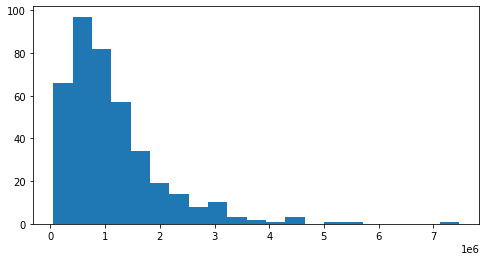

环境污染治理投资总额 Min: 0.0


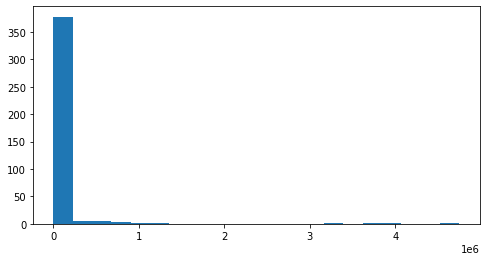

工业废水排放量 Min: 0.0


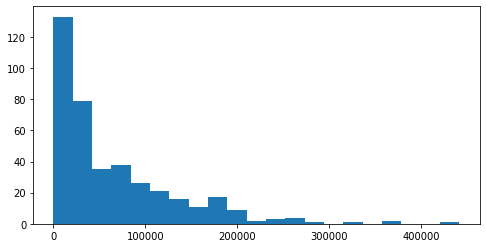

工业二氧化硫去除量 Min: 0.0


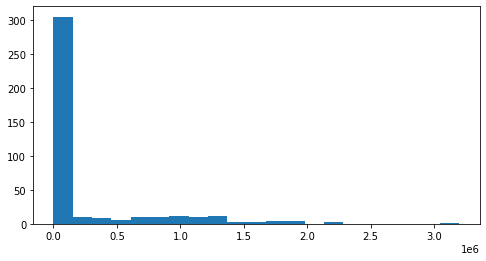

工业烟尘去除量 Min: 0.0


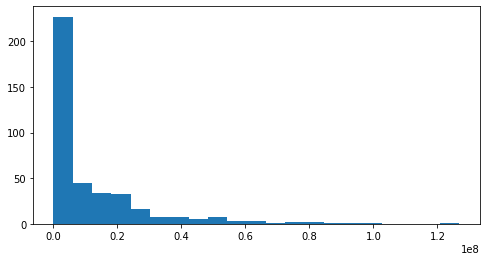

工业烟尘排放量 Min: 0.0


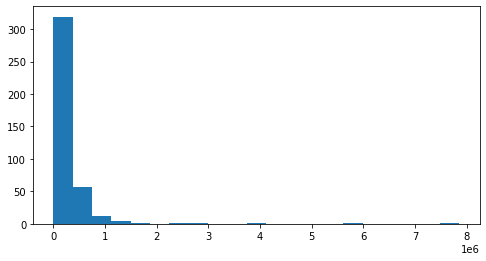

工业固体废物综合利用率(%) Min: 0.6200000047683716


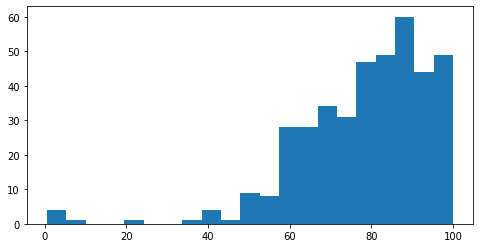

生活垃圾无害化处理率(%) Min: 55.157142639160156


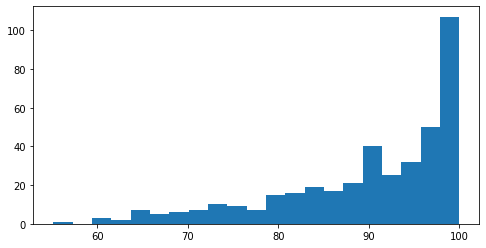

In [ ]:
for col in dataset.columns:
    if not pd.api.types.is_numeric_dtype(dataset[col]):
        continue
    fig = plt.figure(figsize=(8, 4))
    print(col, 'Min:', dataset[col].min())
    plt.hist(dataset[col], bins=21)
    plt.show()
    plt.close(fig)

In [ ]:
dataset['Ln_环境保护支出'] = np.log(dataset['环境保护支出'])
dataset['Ln_环境污染治理投资总额'] = np.log(dataset['环境污染治理投资总额'] + 1)
dataset['Ln_工业废水排放量'] = np.log(dataset['工业废水排放量'] + 1)
dataset['Ln_工业二氧化硫去除量'] = np.log(dataset['工业二氧化硫去除量'] + 1)
dataset['Ln_工业烟尘去除量'] = np.log(dataset['工业烟尘去除量'] + 1)
dataset['Ln_工业烟尘排放量'] = np.log(dataset['工业烟尘排放量'] + 1)
dataset = dataset.drop(columns=[
    '环境保护支出', '环境污染治理投资总额', '工业废水排放量',
    '工业二氧化硫去除量', '工业烟尘去除量', '工业烟尘排放量'
])

Export.

In [ ]:
dataset.to_excel('data/Chinese Govt Environment Metrics 2007~2019.xlsx', index=False)

工业固体废物综合利用率(%) Min: 0.6200000047683716


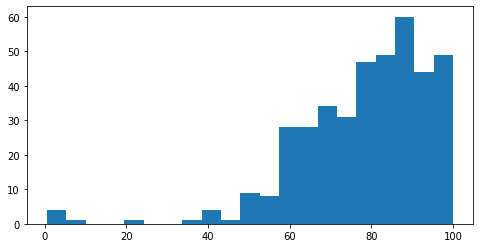

生活垃圾无害化处理率(%) Min: 55.157142639160156


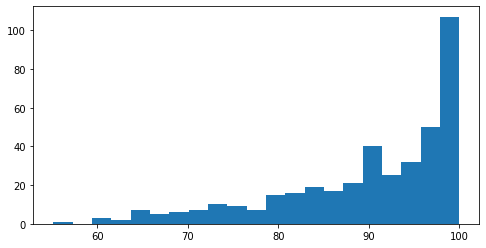

Ln_环境保护支出 Min: 10.882490138206446


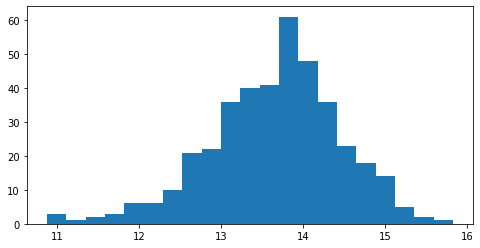

Ln_环境污染治理投资总额 Min: 0.0


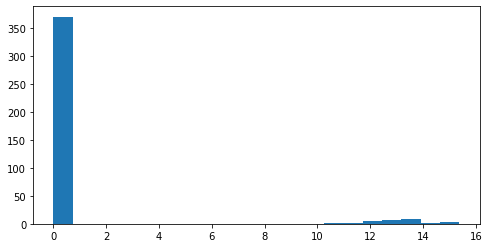

Ln_工业废水排放量 Min: 0.0


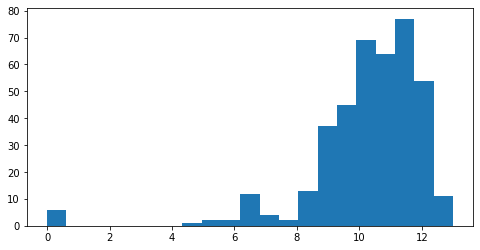

Ln_工业二氧化硫去除量 Min: 0.0


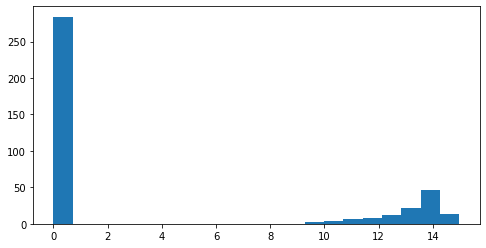

Ln_工业烟尘去除量 Min: 0.0


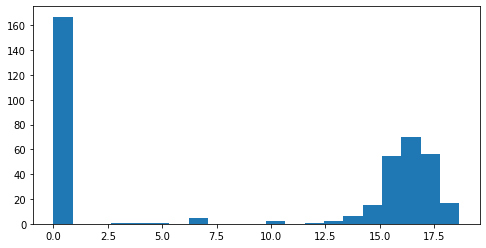

Ln_工业烟尘排放量 Min: 0.0


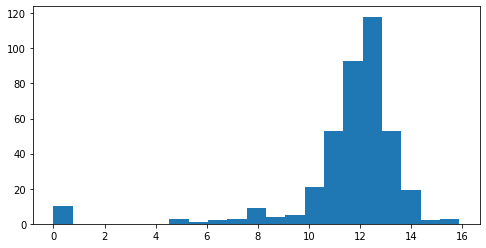

In [ ]:
for col in dataset.columns:
    if not pd.api.types.is_numeric_dtype(dataset[col]):
        continue
    fig = plt.figure(figsize=(8, 4))
    print(col, 'Min:', dataset[col].min())
    plt.hist(dataset[col], bins=21)
    plt.show()
    plt.close(fig)